In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'F:\\Python Learning\\Imarticus'

In [3]:
df = pd.read_csv("datasets/dataframe operations/who.csv")

In [4]:
df.head()

,Unnamed: 0,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,1,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(7240, 61)

Dropping the unwanted columns

In [6]:
df.drop(['Unnamed: 0','iso2','iso3'],axis=1,inplace=True)

In [7]:
df.columns

Index(['country', 'year', 'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534',
       'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65',
       'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544',
       'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65', 'new_sn_m014',
       'new_sn_m1524', 'new_sn_m2534', 'new_sn_m3544', 'new_sn_m4554',
       'new_sn_m5564', 'new_sn_m65', 'new_sn_f014', 'new_sn_f1524',
       'new_sn_f2534', 'new_sn_f3544', 'new_sn_f4554', 'new_sn_f5564',
       'new_sn_f65', 'new_ep_m014', 'new_ep_m1524', 'new_ep_m2534',
       'new_ep_m3544', 'new_ep_m4554', 'new_ep_m5564', 'new_ep_m65',
       'new_ep_f014', 'new_ep_f1524', 'new_ep_f2534', 'new_ep_f3544',
       'new_ep_f4554', 'new_ep_f5564', 'new_ep_f65', 'newrel_m014',
       'newrel_m1524', 'newrel_m2534', 'newrel_m3544', 'newrel_m4554',
       'newrel_m5564', 'newrel_m65', 'newrel_f014', 'newrel_f1524',
       'newrel_f2534', 'newrel_f3544', 'newrel_f4554', 'newrel_f5564',
       'newrel_f65'],
   

The next step is, bringing the wide data into long format.  What are my id variables?  Country and Year are my ID variables.

In [8]:
df1 = df.melt(id_vars=['country','year']).dropna()

In [9]:
df1.shape

(76046, 4)

In [10]:
df1.isnull().sum()

country     0
year        0
variable    0
value       0
dtype: int64

In [11]:
df1.variable.value_counts()

new_sp_m4554    3223
new_sp_m3544    3219
new_sp_m5564    3218
new_sp_m65      3209
new_sp_m1524    3209
new_sp_m2534    3206
new_sp_f4554    3204
new_sp_f2534    3200
new_sp_f3544    3199
new_sp_f65      3197
new_sp_f5564    3195
new_sp_f1524    3194
new_sp_f014     3174
new_sp_m014     3173
new_sn_m014     1045
new_sn_f014     1040
new_ep_m014     1038
new_ep_f014     1032
new_sn_m1524    1030
new_sn_m4554    1027
new_ep_m1524    1026
new_sn_m3544    1025
new_ep_m3544    1024
new_sn_m2534    1022
new_sn_f1524    1022
new_ep_f3544    1021
new_ep_f2534    1021
new_ep_f1524    1021
new_sn_m5564    1021
new_ep_m2534    1020
new_ep_m4554    1020
new_sn_f3544    1020
new_sn_m65      1020
new_sn_f65      1019
new_sn_f4554    1018
new_ep_m65      1018
new_ep_f4554    1017
new_ep_f5564    1017
new_sn_f5564    1017
new_sn_f2534    1016
new_ep_m5564    1015
new_ep_f65      1014
newrel_f014      190
newrel_m014      190
newrel_m5564     185
newrel_f65       185
newrel_m3544     184
newrel_m4554 

Now, we are splitting the variable column by separating the age group.

In [12]:
df1['agegrp'] = df1.variable.str.split('_').apply(lambda x:x[-1])

In [13]:
df1.head()

,country,year,variable,value,agegrp
17,Afghanistan,1997,new_sp_m014,0.0,m014
18,Afghanistan,1998,new_sp_m014,30.0,m014
19,Afghanistan,1999,new_sp_m014,8.0,m014
20,Afghanistan,2000,new_sp_m014,52.0,m014
21,Afghanistan,2001,new_sp_m014,129.0,m014


Now, we are separating the gender from agegrp column.

In [14]:
df1['gender'] = df1.loc[:, 'agegrp'].apply(lambda x: x[0])

In [15]:
df1.head()

,country,year,variable,value,agegrp,gender
17,Afghanistan,1997,new_sp_m014,0.0,m014,m
18,Afghanistan,1998,new_sp_m014,30.0,m014,m
19,Afghanistan,1999,new_sp_m014,8.0,m014,m
20,Afghanistan,2000,new_sp_m014,52.0,m014,m
21,Afghanistan,2001,new_sp_m014,129.0,m014,m


Since we created a gender column, we can remove the gender information from age group.

In [16]:
df1['agegrp'] = df1['agegrp'].apply(lambda x: x[1:])

In [17]:
df1.head()

,country,year,variable,value,agegrp,gender
17,Afghanistan,1997,new_sp_m014,0.0,014,m
18,Afghanistan,1998,new_sp_m014,30.0,014,m
19,Afghanistan,1999,new_sp_m014,8.0,014,m
20,Afghanistan,2000,new_sp_m014,52.0,014,m
21,Afghanistan,2001,new_sp_m014,129.0,014,m


Now, we are removing the unwanted string 'new_' and 'new' variable, so that we can create the treatment type column.

In [18]:
df1['variable'] = df1['variable'].replace({'new_':'','new':''},regex=True)

In [19]:
print(df1.head())
print(df1.tail(10))

        country  year variable  value agegrp gender
17  Afghanistan  1997  sp_m014    0.0    014      m
18  Afghanistan  1998  sp_m014   30.0    014      m
19  Afghanistan  1999  sp_m014    8.0    014      m
20  Afghanistan  2000  sp_m014   52.0    014      m
21  Afghanistan  2001  sp_m014  129.0    014      m
                                   country  year variable   value agegrp  \
405065            United States of America  2013  rel_f65   786.0     65   
405099                             Uruguay  2013  rel_f65    35.0     65   
405167                          Uzbekistan  2013  rel_f65  1120.0     65   
405201                             Vanuatu  2013  rel_f65     7.0     65   
405235  Venezuela (Bolivarian Republic of)  2013  rel_f65   402.0     65   
405269                            Viet Nam  2013  rel_f65  3110.0     65   
405303           Wallis and Futuna Islands  2013  rel_f65     2.0     65   
405371                               Yemen  2013  rel_f65   360.0     65   
4054

In [20]:
df1['treat_type'] = df1['variable'].str.split('_').apply(lambda x: x[0])

In [21]:
df1.head()

,country,year,variable,value,agegrp,gender,treat_type
17,Afghanistan,1997,sp_m014,0.0,014,m,sp
18,Afghanistan,1998,sp_m014,30.0,014,m,sp
19,Afghanistan,1999,sp_m014,8.0,014,m,sp
20,Afghanistan,2000,sp_m014,52.0,014,m,sp
21,Afghanistan,2001,sp_m014,129.0,014,m,sp


In the last step we can drop the unwanted column 'variable'.  we got the clean dataset for our analysis.

In [22]:
df1.drop(['variable'],axis=1,inplace=True)
df1.head()

,country,year,value,agegrp,gender,treat_type
17,Afghanistan,1997,0.0,014,m,sp
18,Afghanistan,1998,30.0,014,m,sp
19,Afghanistan,1999,8.0,014,m,sp
20,Afghanistan,2000,52.0,014,m,sp
21,Afghanistan,2001,129.0,014,m,sp


In [23]:
df1.reset_index(drop=True, inplace=True)

In [24]:
df1.head()

,country,year,value,agegrp,gender,treat_type
0,Afghanistan,1997,0.0,014,m,sp
1,Afghanistan,1998,30.0,014,m,sp
2,Afghanistan,1999,8.0,014,m,sp
3,Afghanistan,2000,52.0,014,m,sp
4,Afghanistan,2001,129.0,014,m,sp


In [25]:
import matplotlib.pyplot as plt

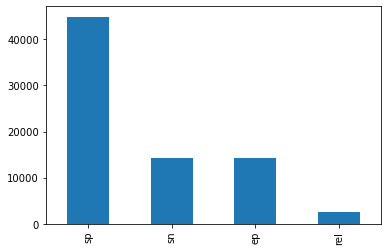

In [26]:
df1.treat_type.value_counts().plot.bar()
plt.show()

<AxesSubplot:>

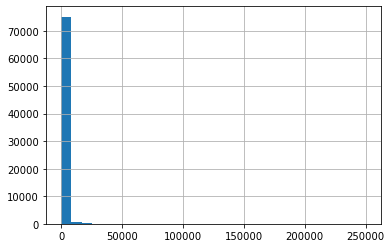

In [32]:
df1.value.hist(bins=30)

In [33]:
df1.value.describe()

count     76046.000000
mean        570.674565
std        3544.814953
min           0.000000
25%           3.000000
50%          26.000000
75%         184.000000
max      250051.000000
Name: value, dtype: float64

In [28]:
df1.value.max()

250051.0

In [31]:
df1[df1.value > 30000.0]

,country,year,value,agegrp,gender,treat_type
3771,China,2004,35465.0,1524,m,sp
3772,China,2005,43005.0,1524,m,sp
3773,China,2006,44528.0,1524,m,sp
3774,China,2007,44011.0,1524,m,sp
3775,China,2008,45596.0,1524,m,sp
...,...,...,...,...,...,...
75281,South Africa,2013,41071.0,2534,f,rel
75350,China,2013,38804.0,3544,f,rel
75534,China,2013,37138.0,4554,f,rel
75717,China,2013,40892.0,5564,f,rel


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76046 entries, 0 to 76045
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     76046 non-null  object 
 1   year        76046 non-null  int64  
 2   value       76046 non-null  float64
 3   agegrp      76046 non-null  object 
 4   gender      76046 non-null  object 
 5   treat_type  76046 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.5+ MB


In [35]:
df1.gender.value_counts()

m    38098
f    37948
Name: gender, dtype: int64

In [38]:
round(df1.gender.value_counts(normalize=True)*100,2)

m    50.1
f    49.9
Name: gender, dtype: float64